In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
m2v_xgboost_h_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_h_fold_1.csv')
m2v_xgboost_h_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_h_fold_2.csv')
m2v_xgboost_h_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_h_fold_3.csv')
m2v_xgboost_h_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_h_fold_4.csv')
m2v_xgboost_h_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_h_fold_5.csv')
m2v_xgboost_h_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/mol2vec_xgboost_hansen_h_fold_6.csv')
m2v_xgboost_h = pd.concat((m2v_xgboost_h_1, m2v_xgboost_h_2, m2v_xgboost_h_3, m2v_xgboost_h_4, m2v_xgboost_h_5, m2v_xgboost_h_6), axis=0)
m2v_xgboost_h = m2v_xgboost_h.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_xgboost_h['actual'], m2v_xgboost_h['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_xgboost_h['actual'], m2v_xgboost_h['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_xgboost_h['actual'], m2v_xgboost_h['predict']))

2.1533758747285208
3.313018960437742
0.5890580792975934


In [4]:
len(m2v_xgboost_h)

1183

In [5]:
m2v_xgboost_h['residual']= m2v_xgboost_h['predict']-m2v_xgboost_h['actual']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_xgboost_h['residual']**2).sum()/(len(m2v_xgboost_h)-2))
sdr

3.315823039619728

In [7]:
m2v_xgboost_h['std_residual'] = m2v_xgboost_h['residual']/sdr
m2v_xgboost_h['std_residual']

0     -0.053824
1     -0.013357
2      0.737609
3      0.170710
4     -0.455067
         ...   
192   -1.216706
193    0.128765
194   -0.046629
195    0.312461
196    0.441813
Name: std_residual, Length: 1183, dtype: float64

In [8]:
m2v_xgboost_h.to_csv('m2v_xgboost_h.csv')
m2v_xgboost_h

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
0,0,10,10,10,COC(CC(OC)OC)OC,10,6.8,6.621530,-0.178470,-0.053824
1,1,23,23,23,FC(F)=C,23,3.6,3.555712,-0.044288,-0.013357
2,2,31,31,31,ClCC(Cl)CCl,31,3.4,5.845782,2.445782,0.737609
3,3,44,44,44,CCc1ccccc1CC,44,1.0,1.566045,0.566045,0.170710
4,4,49,49,49,SCCS,49,8.7,7.191080,-1.508920,-0.455067
...,...,...,...,...,...,...,...,...,...,...
192,192,1130,1132,1130,CCO[P](=O)(OCC)OCC,1130,9.2,5.165617,-4.034382,-1.216706
193,193,1153,1157,1153,CCCCOC=C,1153,5.1,5.526962,0.426962,0.128765
194,194,1154,1158,1154,CCCCSC=C,1154,5.4,5.245386,-0.154614,-0.046629
195,195,1157,1161,1157,ClC=C,1157,2.4,3.436066,1.036066,0.312461


In [9]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_xgboost_h_outliers = m2v_xgboost_h.loc[abs(m2v_xgboost_h['std_residual']) > n]
len(m2v_xgboost_h_outliers)

18

In [10]:
m2v_xgboost_h_outliers.to_csv('m2v_xgboost_h_outliers3.csv')

In [11]:
m2v_xgboost_h_outliers

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
29,29,198,198,198,OC1CCC=C1,198,15.6,5.370367,-10.229633,-3.085096
123,123,732,733,732,OCC(O)CO.OC(O)=O,732,17.4,31.408684,14.008684,4.224798
124,124,733,734,733,CC(O)=O.OCC(O)CO.OC(O)=O,733,9.2,21.183853,11.983853,3.614141
144,144,845,847,845,COO,845,30.0,10.129034,-19.870966,-5.992770
158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,10.598709,-13.501291,-4.071777
38,38,237,237,237,OCC#C,237,18.8,8.063548,-10.736452,-3.237945
132,132,762,764,762,OO,762,42.7,14.982931,-27.717069,-8.359031
139,139,818,820,818,CO,818,22.3,10.000651,-12.299349,-3.709290
30,30,181,181,181,OCC(Cl)=C,181,16.4,5.183987,-11.216013,-3.382573
194,194,1176,1180,1176,O,1176,42.3,16.685217,-25.614783,-7.725015


In [18]:
# Set the default text font size
plt.rc('font', size=22)

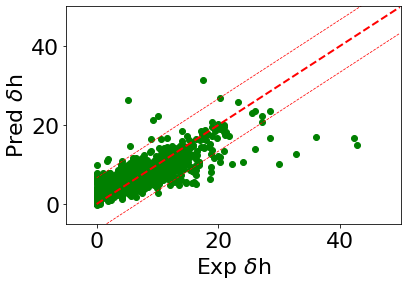

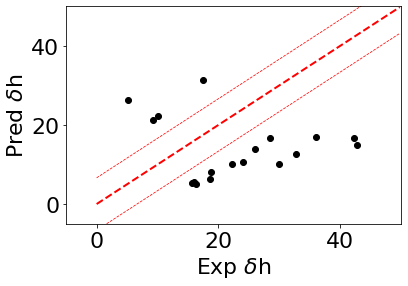

In [19]:
plt.figure(2)

ln = np.arange(0, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_h['actual'], y=m2v_xgboost_h['predict'], color='green')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])

plt.show()

ln = np.arange(0, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_h_outliers['actual'], y=m2v_xgboost_h_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

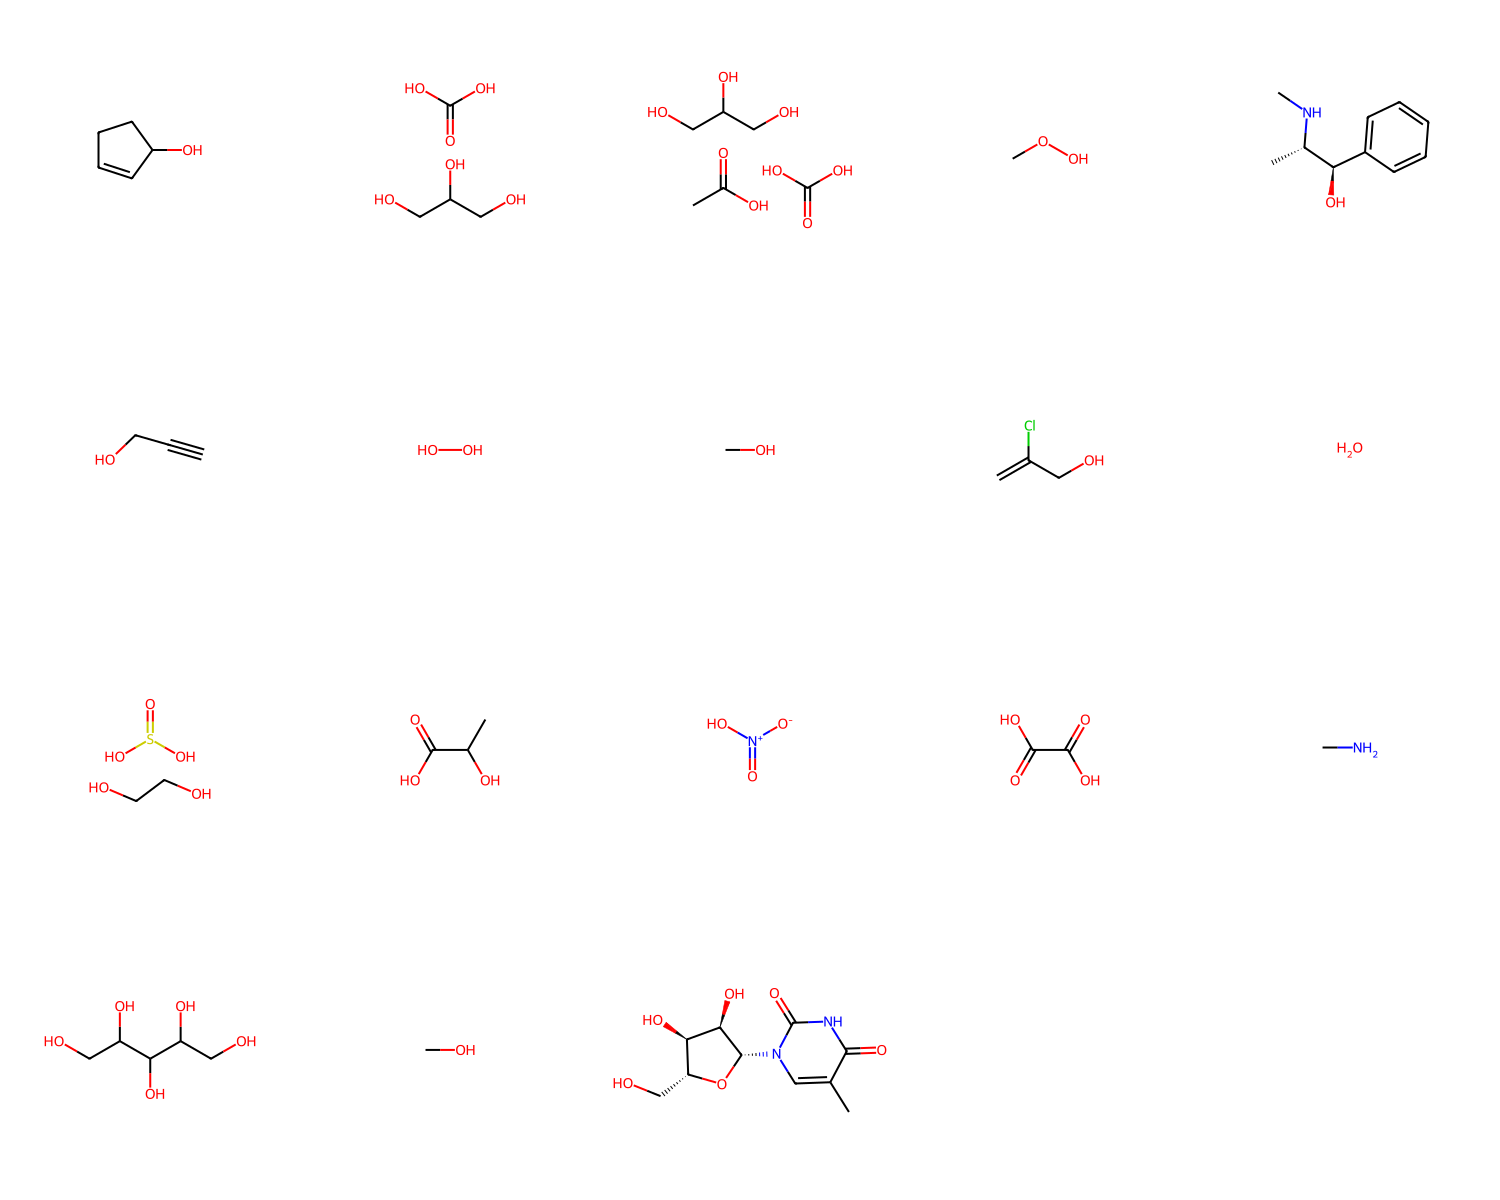

In [20]:
outliners = [Chem.MolFromSmiles(x) for x in m2v_xgboost_h_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [21]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_xgboost_h_outliers2 = m2v_xgboost_h.loc[abs(m2v_xgboost_h['std_residual']) > n]
len(m2v_xgboost_h_outliers2)

55

In [22]:
m2v_xgboost_h_outliers2

,Unnamed: 0,0,1,2,SMILES,Mol_No,actual,predict,residual,std_residual
18,18,113,113,113,CC1(O)CCCCC1,113,12.0,4.775449,-7.224551,-2.178811
29,29,198,198,198,OC1CCC=C1,198,15.6,5.370367,-10.229633,-3.085096
54,54,321,321,321,CC(=O)Nc1ccccc1,321,13.5,4.760143,-8.739857,-2.635803
86,86,497,497,497,C1CC1,497,0.0,6.666021,6.666021,2.010367
122,122,723,724,723,C=O,723,15.4,8.536138,-6.863862,-2.070033
123,123,732,733,732,OCC(O)CO.OC(O)=O,732,17.4,31.408684,14.008684,4.224798
124,124,733,734,733,CC(O)=O.OCC(O)CO.OC(O)=O,733,9.2,21.183853,11.983853,3.614141
144,144,845,847,845,COO,845,30.0,10.129034,-19.870966,-5.992770
158,158,937,939,937,CN[C@@H](C)[C@H](O)c1ccccc1,937,24.1,10.598709,-13.501291,-4.071777
180,180,1079,1081,1079,CC(C)(c1ccc(O)cc1)c2c(Br)cc(OBr)c(Br)c2Br,1079,13.8,5.956008,-7.843992,-2.365624


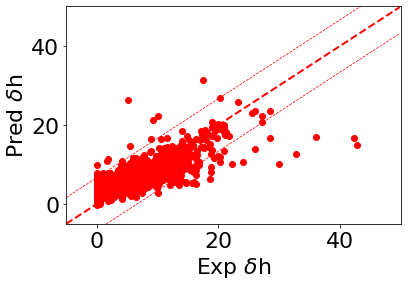

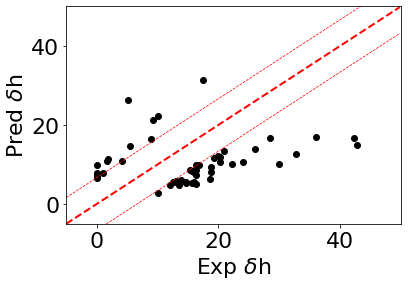

In [23]:
plt.figure(2)

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_h['actual'], y=m2v_xgboost_h['predict'], color='red')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

ln = np.arange(-5, 50, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_xgboost_h_outliers2['actual'], y=m2v_xgboost_h_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$h')
plt.ylabel('Pred $\delta$h')
plt.xlim([-5,50])
plt.ylim([-5,50])
plt.show()

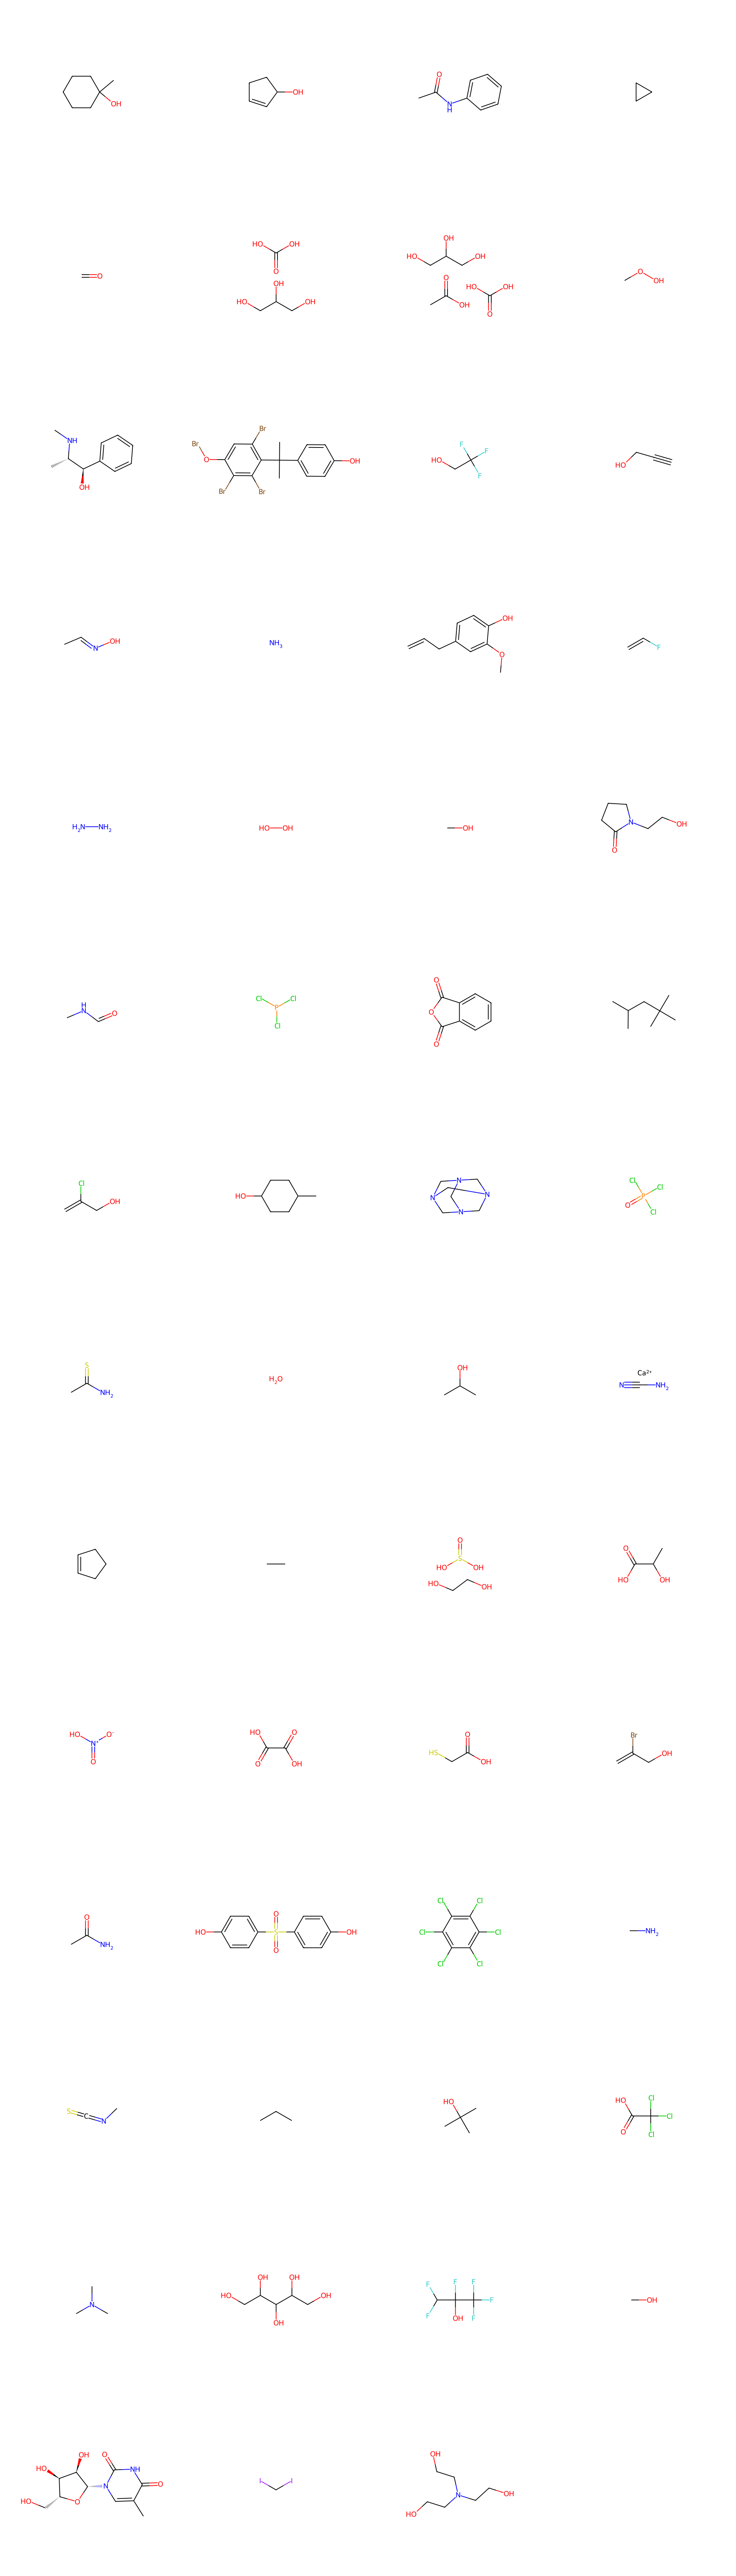

In [16]:
outliers2 = [Chem.MolFromSmiles(x) for x in m2v_xgboost_h_outliers2['SMILES']]
Draw.MolsToGridImage(outliers2, subImgSize=(500,500), molsPerRow=4, maxMols=200)

In [17]:
m2v_xgboost_h_outliers2.to_csv('m2v_xgboost_h_outliers2.csv')

In [33]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_xgboost_h_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
112.00211309563963


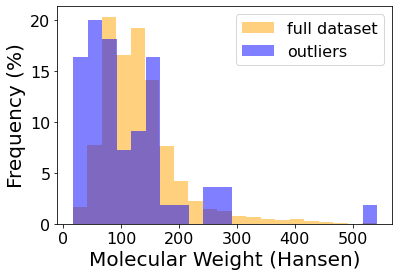

In [35]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()